In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/content/Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state=0)

In [8]:
print(xtrain[:3])
print('-'*15)
print(ytrain[:3])
print('-'*15)
print(xtest[:3])
print('-'*15)
print(ytest[:3])

[[    44  39000]
 [    32 120000]
 [    38  50000]]
---------------
[0 1 0]
---------------
[[   30 87000]
 [   38 50000]
 [   35 75000]]
---------------
[0 0 0]


In [9]:
from sklearn.preprocessing import StandardScaler  
scx = StandardScaler()
xtrain = scx.fit_transform(xtrain)
xtest = scx.fit_transform(xtest)

In [10]:
print(xtrain[:3])
print('-'*15)
print(xtest[:3])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]]
---------------
[[-0.54748976  0.5130727 ]
 [ 0.15442019 -0.61825566]
 [-0.10879604  0.14615539]]


In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,solver='lbfgs')
classifier.fit(xtrain,ytrain)
ypred = classifier.predict(xtest)
xtest[:10]

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566],
       [-0.81070599, -1.53554892],
       [-0.45975102, -1.68843113],
       [-0.0210573 ,  2.25592989],
       [-1.60035469, -0.0678797 ],
       [ 0.94406888, -0.83229075]])

In [14]:
print('-'*15)
print(ypred[:10])

---------------
[0 0 0 0 0 0 0 1 0 1]


In [15]:
print(ypred[:20])
print(ytest[:20])

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm

array([[63,  5],
       [ 8, 24]])

<ipython-input-24-4b3437a45d48>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xset[yset == j, 0], xset[yset == j, 1],


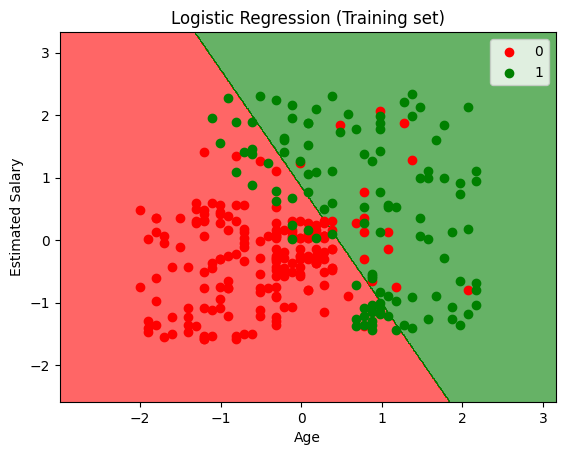

In [24]:
from matplotlib.colors import ListedColormap
xset,yset = xtrain,ytrain
x1,x2 = np.meshgrid(np.arange(start=xset[:,0].min()-1,stop=xset[:,0].max()+1,step=0.01),
                    np.arange(start=xset[:,1].min()-1,stop=xset[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.6, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i, j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset == j, 0], xset[yset == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
